In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression

In [201]:
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-02 21:01:10 UTC,Brazil,G,92.89519,3.02538,0.26423,2.00000,0.00000,1.00000,2.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82453,0.63086,0.42125,0.26399,2022-12-02 21:02:41 UTC
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC
3,2022-12-02 21:01:10 UTC,France,D,88.57378,2.83760,0.46033,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.81511,0.46123,0.24482,0.12131,2022-12-02 21:02:41 UTC
4,2022-12-02 21:01:10 UTC,England,B,86.96946,2.62701,0.44455,2.00000,1.00000,0.00000,7.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.68391,0.36842,0.19286,0.09399,2022-12-02 21:02:41 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-12-02 21:02:41 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC
125,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-12-02 21:02:41 UTC
126,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-12-02 21:02:41 UTC


In [202]:
dfteam = df.sort_values("team")
dfteam1 = dfteam.drop_duplicates(subset="team", keep = "first")
dfteam1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.54059,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.85231,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.00441,0.04494,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.05813,0.20035,0.25522,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.01311,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.27547,0.26872,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.19014,0.29195,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC


In [203]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored"]], dfteam1["win_league"])
dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3560026941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.04494,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.20035,0.25522,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.26872,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.29195,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036


In [204]:
dfcandidate = dfteam1.sort_values("predict_results", ascending = False)
dfcandidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812


In [205]:
dfA16 = dfcandidate[df.group == "A"].head(n = 2)
dfA16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1248350719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA16 = dfcandidate[df.group == "A"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.23302,0.69809,0.00266,0.29925,0.12513,0.04647,0.01650,0.00545,2022-12-02 21:02:41 UTC,0.039227


In [206]:
dfB16 = dfcandidate[df.group == "B"].head(n = 2)
dfB16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\2245931670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB16 = dfcandidate[df.group == "B"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368
90,2022-11-24 20:56:17 UTC,Iran,B,63.32507,1.64128,0.84941,0.62716,0.61752,1.75532,-4.25898,...,0.23014,0.24568,0.50543,0.24889,0.08052,0.03273,0.00781,0.00220,2022-12-02 21:02:41 UTC,0.00788


In [207]:
dfC16 = dfcandidate[df.group == "C"].head(n = 2)
dfC16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\2619915074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC16 = dfcandidate[df.group == "C"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-02 21:02:41 UTC,0.034231


In [208]:
dfD16 = dfcandidate[df.group == "D"].head(n = 2)
dfD16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3568035520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD16 = dfcandidate[df.group == "D"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-02 21:02:41 UTC,0.000904


In [209]:
dfE16 = dfcandidate[df.group == "E"].head(n = 2)
dfE16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3174875314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE16 = dfcandidate[df.group == "E"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.0000,1.00000,6.00000,...,1.00000,0.0000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670


In [210]:
dfF16 = dfcandidate[df.group == "F"].head(n = 2)
dfF16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\2577019320.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfF16 = dfcandidate[df.group == "F"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812


In [211]:
dfG16 = dfcandidate[df.group == "G"].head(n = 2)
dfG16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1284428377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfG16 = dfcandidate[df.group == "G"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189


In [212]:
dfH16 = dfcandidate[df.group == "H"].head(n = 2)
dfH16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3074301813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfH16 = dfcandidate[df.group == "H"].head(n = 2)


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.48823,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155


In [213]:
dfAwinners = dfA16.sort_values("predict_results", ascending = False).head(n = 1)
dfAwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.3837,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.0,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243


In [214]:
dfARunners_up = dfA16.sort_values("predict_results").head(n = 1)
dfARunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.23302,0.69809,0.00266,0.29925,0.12513,0.04647,0.0165,0.00545,2022-12-02 21:02:41 UTC,0.039227


In [215]:
dfBwinners = dfB16.sort_values("predict_results", ascending = False).head(n = 1)
dfBwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368


In [216]:
dfBRunners_up = dfB16.sort_values("predict_results").head(n = 1)
dfBRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
90,2022-11-24 20:56:17 UTC,Iran,B,63.32507,1.64128,0.84941,0.62716,0.61752,1.75532,-4.25898,...,0.23014,0.24568,0.50543,0.24889,0.08052,0.03273,0.00781,0.0022,2022-12-02 21:02:41 UTC,0.00788


In [217]:
dfCwinners = dfC16.sort_values("predict_results", ascending = False).head(n = 1)
dfCwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901


In [218]:
dfCRunners_up = dfC16.sort_values("predict_results").head(n = 1)
dfCRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-02 21:02:41 UTC,0.034231


In [219]:
dfDwinners = dfD16.sort_values("predict_results", ascending = False).head(n = 1)
dfDwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.0875,2022-12-02 21:02:41 UTC,0.089996


In [220]:
dfDRunners_up = dfD16.sort_values("predict_results").head(n = 1)
dfDRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-02 21:02:41 UTC,0.000904


In [221]:
dfEwinners = dfE16.sort_values("predict_results", ascending = False).head(n = 1)
dfEwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812


In [222]:
dfERunners_up = dfE16.sort_values("predict_results").head(n = 1)
dfERunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.06067


In [223]:
dfFwinners = dfF16.sort_values("predict_results", ascending = False).head(n = 1)
dfFwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.1418,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559


In [224]:
dfFRunners_up = dfF16.sort_values("predict_results").head(n = 1)
dfFRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812


In [225]:
dfGwinners = dfG16.sort_values("predict_results", ascending = False).head(n = 1)
dfGwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343


In [226]:
dfGRunners_up = dfG16.sort_values("predict_results").head(n = 1)
dfGRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189


In [227]:
dfHwinners = dfH16.sort_values("predict_results", ascending = False).head(n = 1)
dfHwinners

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985


In [228]:
dfHRunners_up = dfH16.sort_values("predict_results").head(n = 1)
dfHRunners_up

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.48823,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155


In [229]:
frame1 = [dfAwinners, dfBRunners_up]
RoundOf16Game1_December3 = pd.concat(frame1)
RoundOf16Game1_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243
90,2022-11-24 20:56:17 UTC,Iran,B,63.32507,1.64128,0.84941,0.62716,0.61752,1.75532,-4.25898,...,0.23014,0.24568,0.50543,0.24889,0.08052,0.03273,0.00781,0.00220,2022-12-02 21:02:41 UTC,0.007880


<AxesSubplot: xlabel='team'>

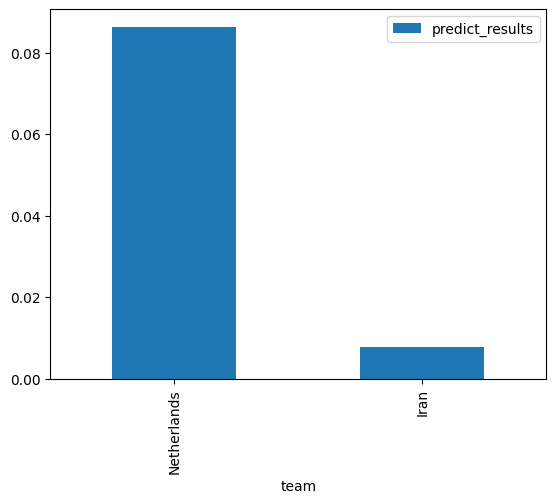

In [230]:
RoundOf16Game1_December3.reset_index().plot.bar(x="team", y="predict_results")

In [231]:
WinnersOfMatch49 = RoundOf16Game1_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch49

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.3837,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.0,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243


In [232]:
frame2 = [dfCwinners, dfDRunners_up]
RoundOf16Game2_December3 = pd.concat(frame2)
RoundOf16Game2_December3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-02 21:02:41 UTC,0.000904


<AxesSubplot: xlabel='team'>

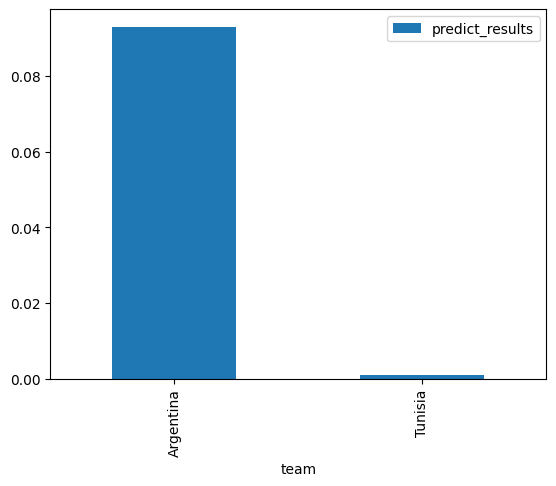

In [233]:
RoundOf16Game2_December3.reset_index().plot.bar(x="team", y="predict_results")

In [234]:
WinnersOfMatch50 = RoundOf16Game2_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch50

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901


In [235]:
frame3 = [dfEwinners, dfFRunners_up]
RoundOf16Game1_December5 = pd.concat(frame3)
RoundOf16Game1_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812


<AxesSubplot: xlabel='team'>

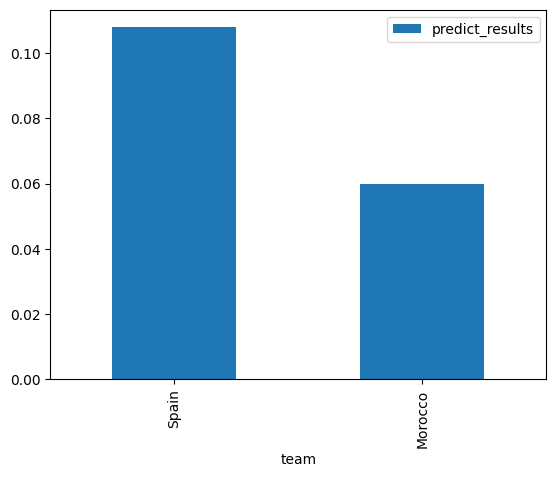

In [236]:
RoundOf16Game1_December5.reset_index().plot.bar(x="team", y="predict_results")

In [237]:
WinnersOfMatch53 = RoundOf16Game1_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch53

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812


In [238]:
frame4 = [dfGwinners, dfHRunners_up]
RoundOf16Game2_December5 = pd.concat(frame4)
RoundOf16Game2_December5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.48823,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155


<AxesSubplot: xlabel='team'>

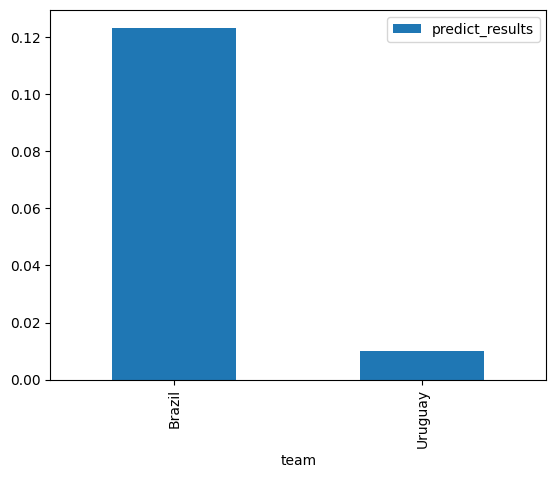

In [239]:
RoundOf16Game2_December5.reset_index().plot.bar(x="team", y="predict_results")

In [240]:
WinnersOfMatch54 = RoundOf16Game2_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch54


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343


In [241]:
frame5 = [dfBwinners, dfARunners_up]
RoundOf16Game1_December4 = pd.concat(frame5)
RoundOf16Game1_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.23302,0.69809,0.00266,0.29925,0.12513,0.04647,0.01650,0.00545,2022-12-02 21:02:41 UTC,0.039227


<AxesSubplot: xlabel='team'>

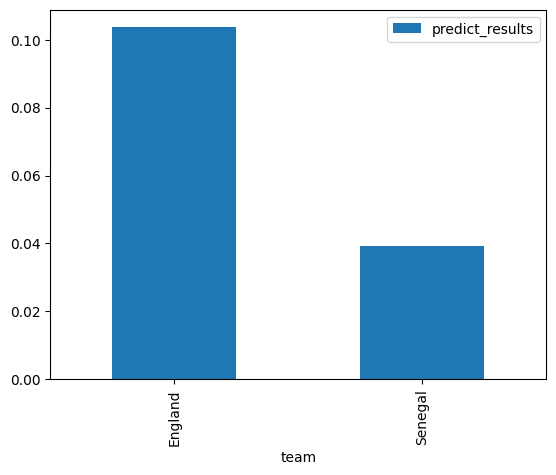

In [242]:
RoundOf16Game1_December4.reset_index().plot.bar(x="team", y="predict_results")

In [243]:
WinnersOfMatch51 = RoundOf16Game1_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch51

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368


In [244]:
frame6 = [dfDwinners, dfCRunners_up]
RoundOf16Game2_December4 = pd.concat(frame6)
RoundOf16Game2_December4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-02 21:02:41 UTC,0.034231


<AxesSubplot: xlabel='team'>

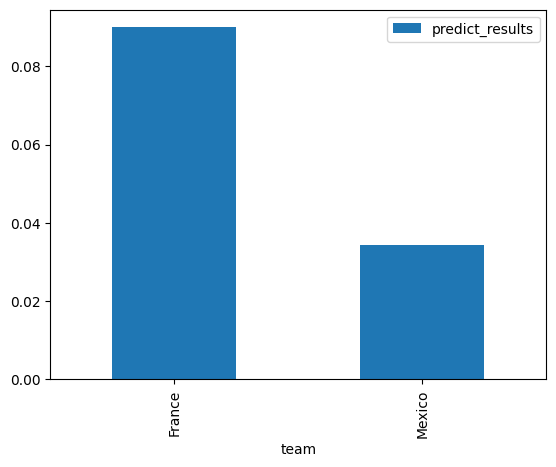

In [245]:
RoundOf16Game2_December4.reset_index().plot.bar(x="team", y="predict_results")


In [246]:
WinnersOfMatch52 = RoundOf16Game2_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch52

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.0875,2022-12-02 21:02:41 UTC,0.089996


In [247]:
frame7 = [dfFwinners, dfERunners_up]
RoundOf16Game1_December6 = pd.concat(frame7)
RoundOf16Game1_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670


<AxesSubplot: xlabel='team'>

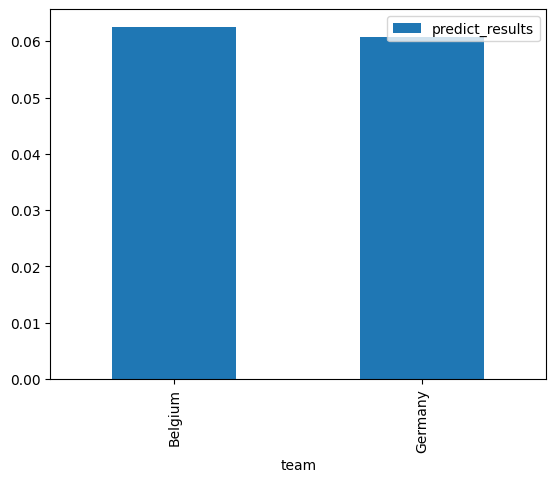

In [248]:
RoundOf16Game1_December6.reset_index().plot.bar(x="team", y="predict_results")

In [249]:
WinnersOfMatch55 = RoundOf16Game1_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch55

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.1418,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559


In [250]:
frame8 = [dfHwinners, dfGRunners_up]
RoundOf16Game2_December6 = pd.concat(frame8)
RoundOf16Game2_December6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.67384,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189


<AxesSubplot: xlabel='team'>

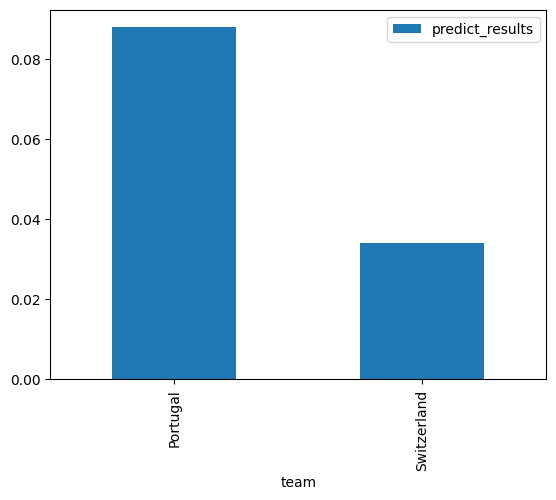

In [251]:
RoundOf16Game2_December6.reset_index().plot.bar(x="team", y="predict_results")

In [252]:
WinnersOfMatch56 = RoundOf16Game2_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch56

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985


In [253]:
frame9 = [WinnersOfMatch49, WinnersOfMatch50]
QuaterFinalsGame1_December9 = pd.concat(frame9)
QuaterFinalsGame1_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.0,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.0,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901


<AxesSubplot: xlabel='team'>

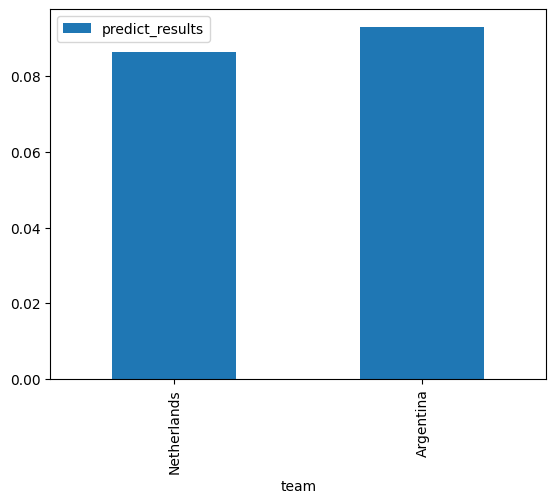

In [254]:
QuaterFinalsGame1_December9.reset_index().plot.bar(x="team", y="predict_results")

In [255]:
WinnersOfMatch57 = QuaterFinalsGame1_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch57

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901


In [256]:
frame10 = [WinnersOfMatch53, WinnersOfMatch54]
QuaterFinalsGame2_December9 = pd.concat(frame10)
QuaterFinalsGame2_December9 

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343


<AxesSubplot: xlabel='team'>

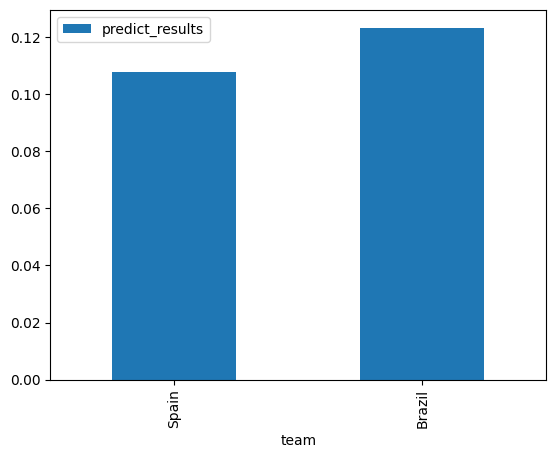

In [257]:
QuaterFinalsGame2_December9.reset_index().plot.bar(x="team", y="predict_results")

In [258]:
WinnersOfMatch58 = QuaterFinalsGame2_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch58

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343


In [259]:
frame11 = [WinnersOfMatch51, WinnersOfMatch52]
QuaterFinalsGame1_December10 = pd.concat(frame11)
QuaterFinalsGame1_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996


<AxesSubplot: xlabel='team'>

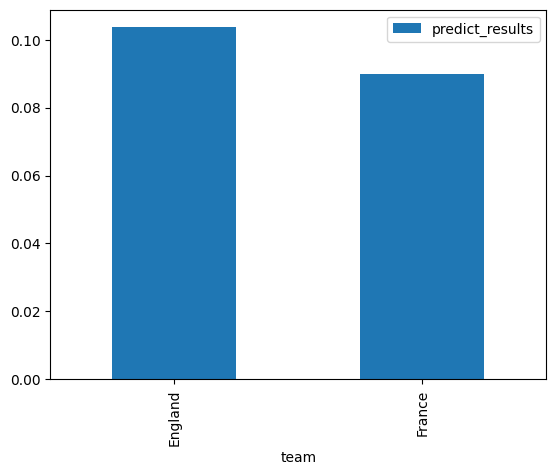

In [260]:
QuaterFinalsGame1_December10.reset_index().plot.bar(x="team", y="predict_results")


In [261]:
WinnersOfMatch59 = QuaterFinalsGame1_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch59

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368


In [262]:
frame12 = [WinnersOfMatch55, WinnersOfMatch56]
QuaterFinalsGame2_December10 = pd.concat(frame12)
QuaterFinalsGame2_December10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.23882,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985


<AxesSubplot: xlabel='team'>

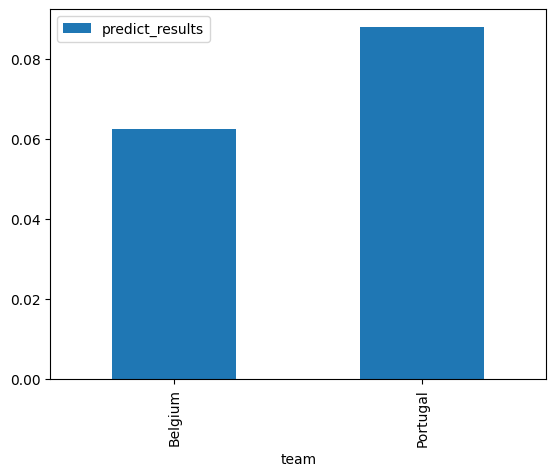

In [263]:
QuaterFinalsGame2_December10.reset_index().plot.bar(x="team", y="predict_results")

In [264]:
WinnersOfMatch60 = QuaterFinalsGame2_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch60

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985


In [265]:
frame13 = [WinnersOfMatch57, WinnersOfMatch58]
SemiFinalsGame1_December13 = pd.concat(frame13)
SemiFinalsGame1_December13

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343


<AxesSubplot: xlabel='team'>

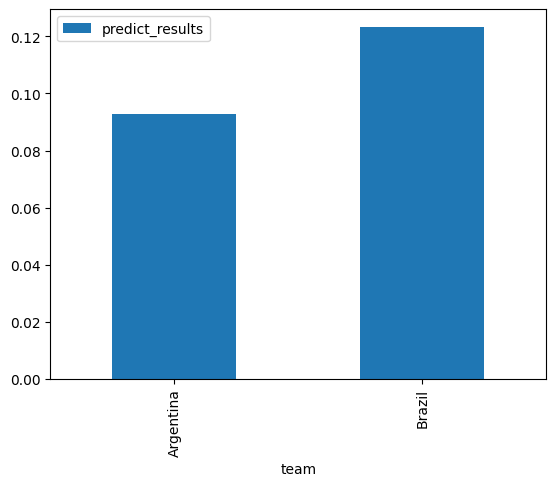

In [266]:
SemiFinalsGame1_December13.reset_index().plot.bar(x="team", y="predict_results")

In [267]:
WinnersOfMatch61 = SemiFinalsGame1_December13.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch61

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343


In [268]:
frame14 = [WinnersOfMatch59, WinnersOfMatch60]
SemiFinalsGame1_December14 = pd.concat(frame14)
SemiFinalsGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.27626,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985


<AxesSubplot: xlabel='team'>

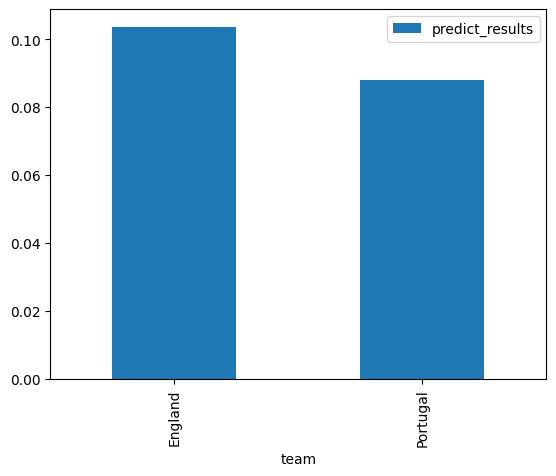

In [269]:
SemiFinalsGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [270]:
WinnersOfMatch62 = SemiFinalsGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch62

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.1782,0.00084,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368


In [271]:
frame15 = [WinnersOfMatch61, WinnersOfMatch62]
FinalGame1_December14 = pd.concat(frame15)
FinalGame1_December14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680


<AxesSubplot: xlabel='team'>

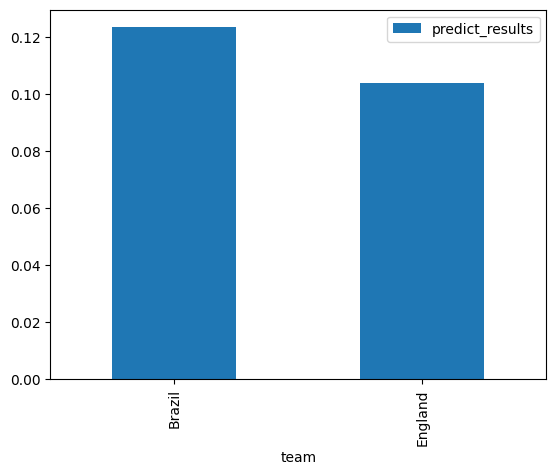

In [272]:
FinalGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [273]:
WinnersOfFIFA2022WorldCup = FinalGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfFIFA2022WorldCup

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.13118,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343


In [274]:
dfgame1candidate1 = dfcandidate[dfcandidate.team == "Japan"]
dfgame1candidate1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.9156,0.76006,1.32434,-1.03341,...,0.23408,0.43682,0.21826,0.34492,0.1576,0.05775,0.02465,0.00876,2022-12-02 21:02:41 UTC,0.023524


In [275]:
dfgame1candidate2 = dfcandidate[dfcandidate.team == "Spain"]
dfgame1candidate2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812


In [276]:
frameA = [dfgame1candidate1, dfgame1candidate2]
game1 = pd.concat(frameA)
game1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.9156,0.76006,1.32434,-1.03341,...,0.23408,0.43682,0.21826,0.34492,0.15760,0.05775,0.02465,0.00876,2022-12-02 21:02:41 UTC,0.023524
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812


<AxesSubplot: xlabel='team'>

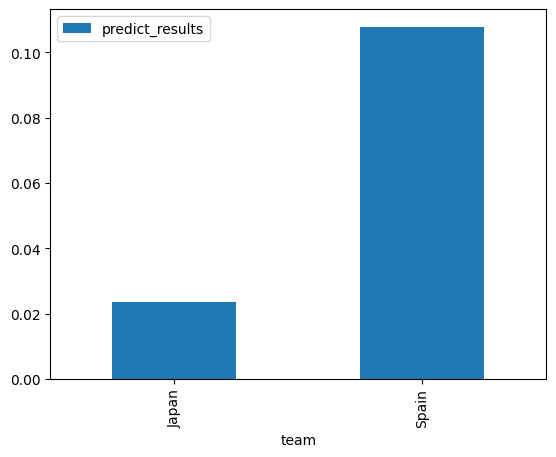

In [277]:
game1.reset_index().plot.bar(x="team", y="predict_results")

In [278]:
WinnerOfGame1 = game1.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812


In [279]:
dfgame2candidate1 = dfcandidate[dfcandidate.team == "Costa Rica"]
dfgame2candidate1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.1424,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.0002,2022-12-02 21:02:41 UTC,-0.02445


In [280]:
dfgame2candidate2 = dfcandidate[dfcandidate.team == "Germany"]
dfgame2candidate2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.06067


In [281]:
frameB = [dfgame2candidate1, dfgame2candidate2]
game2 = pd.concat(frameB)
game2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.1424,1.80585,-8.01357,...,0.12624,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.02445
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.06067


<AxesSubplot: xlabel='team'>

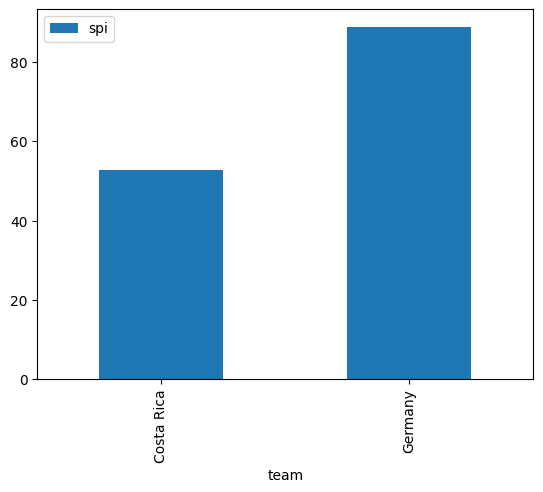

In [282]:
game2.reset_index().plot.bar(x="team", y="spi")

In [283]:
WinnerOfGame2 = game2.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.1424,1.05175,1.01357,...,0.67345,0.1324,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.06067


In [284]:
frameR16 = [dfA16, dfB16, dfC16, dfD16, dfE16, dfF16, dfG16, dfH16]
RoundOf16Candidate = pd.concat(frameR16)
RoundOf16Candidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.23478,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.23302,0.69809,0.00266,0.29925,0.12513,0.04647,0.01650,0.00545,2022-12-02 21:02:41 UTC,0.039227
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.17820,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680
90,2022-11-24 20:56:17 UTC,Iran,B,63.32507,1.64128,0.84941,0.62716,0.61752,1.75532,-4.25898,...,0.23014,0.24568,0.50543,0.24889,0.08052,0.03273,0.00781,0.00220,2022-12-02 21:02:41 UTC,0.007880
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901
110,2022-11-16 16:00:55 UTC,Mexico,C,74.29647,2.00635,0.67211,1.10911,0.86111,1.02978,0.15824,...,0.32919,0.27301,0.19063,0.53636,0.22207,0.09943,0.03394,0.01268,2022-12-02 21:02:41 UTC,0.034231
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.27328,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996
119,2022-11-16 16:00:55 UTC,Tunisia,D,65.85461,1.63339,0.74077,0.73256,0.86585,1.40159,-1.46599,...,0.21187,0.34901,0.34237,0.30862,0.11045,0.04178,0.01166,0.00382,2022-12-02 21:02:41 UTC,0.000904
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.13240,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670


In [285]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_round_of_16"])
dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3335883704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.25522,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298,0.314663
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.05486,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450,0.051347
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.24320,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175,0.121859
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.30458,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036,0.509301


In [286]:
dfCandidate = dfteam1.sort_values("predict_ChanceOfRoundOf16", ascending = False)
dfCandidate

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00084,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.00849,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.12328,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.00000,0.00000,1.00000,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.17162,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.29100,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189,0.574142


In [287]:
dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]
dfgroupHcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\346358755.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
56,2022-11-28 20:59:50 UTC,South Korea,H,70.34955,1.84149,0.71967,0.16703,1.24741,1.58556,-1.94343,...,0.25671,0.65417,0.08912,0.01607,0.00556,0.00247,0.00101,2022-12-02 21:02:41 UTC,-0.002803,0.19259


In [288]:
dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]
dfgroupHcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3815101000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307


In [289]:
frameH1 = [dfgroupHcandidate1, dfgroupHcandidate2]
gameH1 = pd.concat(frameH1)
gameH1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
56,2022-11-28 20:59:50 UTC,South Korea,H,70.34955,1.84149,0.71967,0.16703,1.24741,1.58556,-1.94343,...,0.25671,0.65417,0.08912,0.01607,0.00556,0.00247,0.00101,2022-12-02 21:02:41 UTC,-0.002803,0.192590
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307


<AxesSubplot: xlabel='team'>

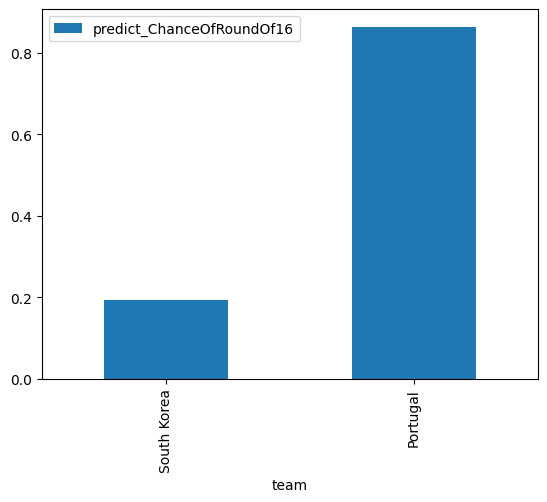

In [290]:
gameH1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [291]:
WinnerOfGameH1 = gameH1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.13468,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307


In [292]:
dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]
dfgroupHcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1798223390.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
93,2022-11-24 20:56:17 UTC,Ghana,H,60.03229,1.50523,0.8658,0.38635,0.61211,2.00154,-2.22472,...,0.21995,0.60969,0.17036,0.0252,0.00636,0.00206,0.0005,2022-12-02 21:02:41 UTC,-0.010313,0.219477


In [293]:
dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]
dfgroupHcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\2481320698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155,0.308072


In [294]:
frameH2 = [dfgroupHcandidate3, dfgroupHcandidate4]
gameH2 = pd.concat(frameH2)
gameH2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
93,2022-11-24 20:56:17 UTC,Ghana,H,60.03229,1.50523,0.86580,0.38635,0.61211,2.00154,-2.22472,...,0.21995,0.60969,0.17036,0.02520,0.00636,0.00206,0.00050,2022-12-02 21:02:41 UTC,-0.010313,0.219477
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155,0.308072


<AxesSubplot: xlabel='team'>

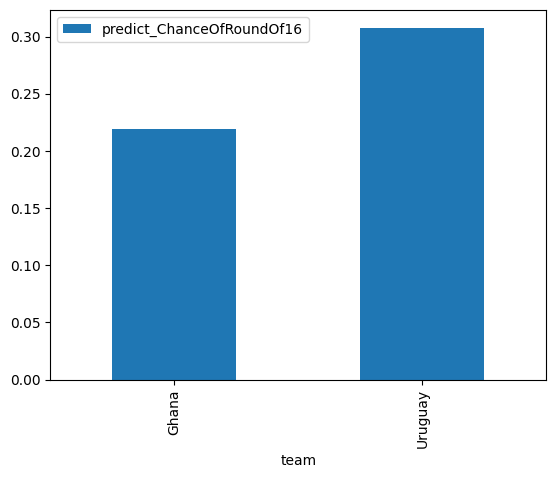

In [295]:
gameH2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [296]:
WinnerOfGameH2 = gameH2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
45,2022-11-28 20:59:50 UTC,Uruguay,H,79.28334,2.08567,0.50822,0.56285,1.27989,1.15726,-1.15685,...,0.25995,0.25182,0.48823,0.12173,0.05184,0.02802,0.01254,2022-12-02 21:02:41 UTC,0.010155,0.308072


In [297]:
dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]
dfgroupGcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1947669684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
52,2022-11-28 20:59:50 UTC,Serbia,G,74.7218,2.19758,0.78677,0.31136,1.291,1.39764,-2.18218,...,0.37027,0.32555,0.30418,0.10171,0.03952,0.01503,0.00462,2022-12-02 21:02:41 UTC,0.020516,0.256755


In [298]:
dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]
dfgroupGcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\4265024335.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189,0.574142


In [299]:
frameG1 = [dfgroupGcandidate1, dfgroupGcandidate2]
gameG1 = pd.concat(frameG1)
gameG1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
52,2022-11-28 20:59:50 UTC,Serbia,G,74.72180,2.19758,0.78677,0.31136,1.291,1.39764,-2.18218,...,0.37027,0.32555,0.30418,0.10171,0.03952,0.01503,0.00462,2022-12-02 21:02:41 UTC,0.020516,0.256755
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.08920,0.61069,1.39764,0.291,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189,0.574142


<AxesSubplot: xlabel='team'>

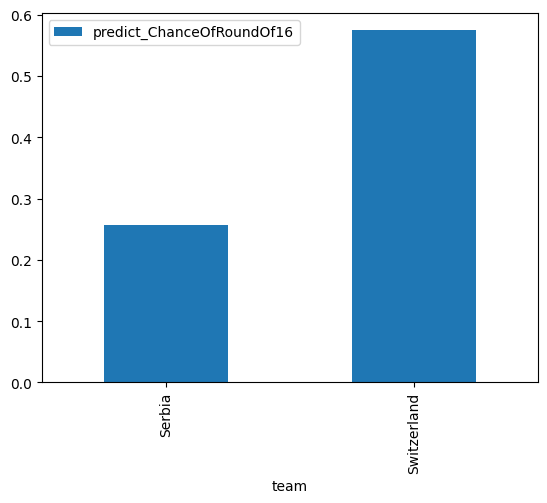

In [300]:
gameG1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [301]:
WinnerOfGameG1 = gameG1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.30992,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189,0.574142


In [302]:
dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]
dfgroupGcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1978172570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.2839,0.66675,0.04935,0.01582,0.00554,0.0021,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068


In [303]:
dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]
dfgroupGcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\3700774475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808


In [304]:
frameG2 = [dfgroupGcandidate3, dfgroupGcandidate4]
gameG2 = pd.concat(frameG2)
gameG2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.28390,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808


<AxesSubplot: xlabel='team'>

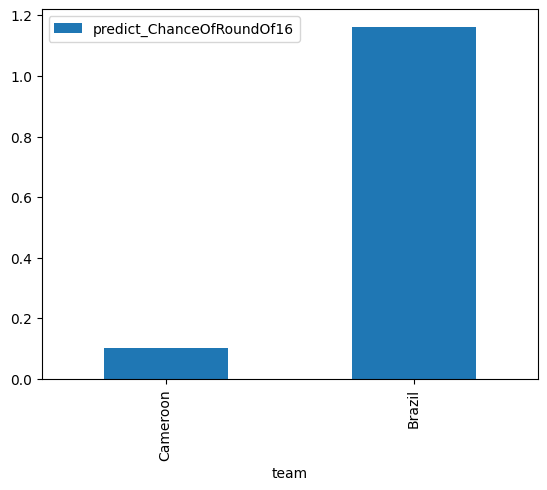

In [305]:
gameG2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [306]:
WinnerOfGameG2 = gameG2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.01552,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808


In [307]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_quarters"])
dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\1097749551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.020340
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.66675,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068,-0.056209
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.48630,0.25848,0.08643,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298,0.314663,0.111761
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.80579,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450,0.051347,-0.057755
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175,0.121859,-0.005291
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.21333,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036,0.509301,0.252478


In [308]:
dfCandidateQ = dfteam1.sort_values("predict_ChanceOfQuarters", ascending = False)
dfCandidateQ

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.00000,1.00000,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.04897,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.19415,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670,0.555090,0.373002


In [309]:
dfQuarter1 = dfCandidateQ[dfCandidateQ.team == "Netherlands"]
dfQuarter1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.3837,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.0,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716


In [310]:
dfQuarter2 = dfCandidateQ[dfCandidateQ.team == "USA"]
dfQuarter2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
49,2022-11-28 20:59:50 UTC,USA,B,72.55486,1.91623,0.68239,0.37672,2.3153,0.30798,0.13273,...,0.10779,0.37672,0.14541,0.06135,0.01639,0.00562,2022-12-02 21:02:41 UTC,-0.000342,0.321871,0.087669


In [311]:
frameQ1 = [dfQuarter1, dfQuarter2]
gameQ1 = pd.concat(frameQ1)
gameQ1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716
49,2022-11-28 20:59:50 UTC,USA,B,72.55486,1.91623,0.68239,0.37672,2.31530,0.30798,0.13273,...,0.10779,0.37672,0.14541,0.06135,0.01639,0.00562,2022-12-02 21:02:41 UTC,-0.000342,0.321871,0.087669


<AxesSubplot: xlabel='team'>

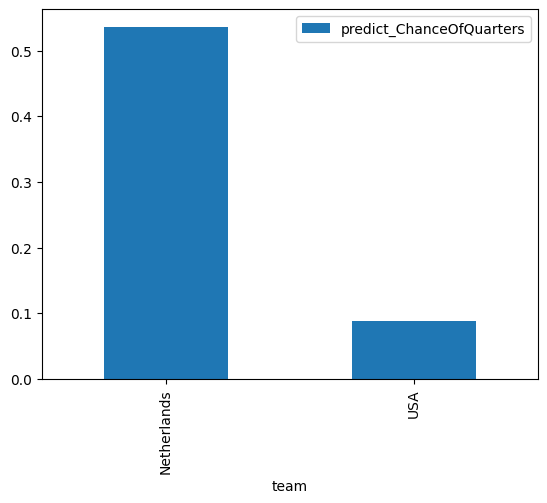

In [312]:
gameQ1.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [313]:
WinnerOfGameQ1 = gameQ1.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.3837,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.0,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716


In [314]:
dfQuarter3 = dfCandidateQ[dfCandidateQ.team == "Argentina"]
dfQuarter3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.92822,0.552825


In [315]:
dfQuarter4 = dfCandidateQ[dfCandidateQ.team == "Australia"]
dfQuarter4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.48143,0.21617,0.065,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.02034


In [316]:
frameQ2 = [dfQuarter3, dfQuarter4]
gameQ2 = pd.concat(frameQ2)
gameQ2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.020340


<AxesSubplot: xlabel='team'>

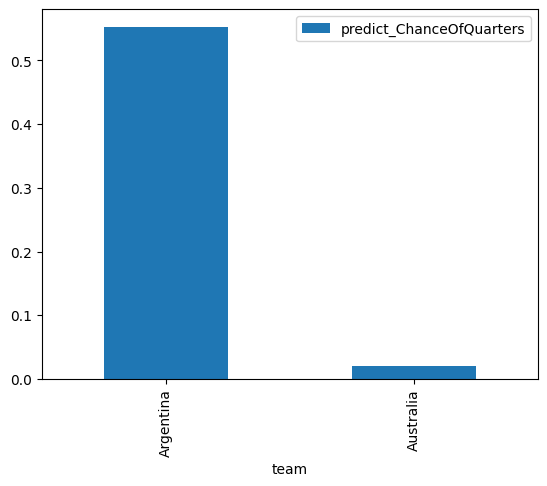

In [317]:
gameQ2.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [318]:
WinnerOfGameQ2 = gameQ2.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,0.0,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.92822,0.552825


In [319]:
dfQuarter5 = dfCandidateQ[dfCandidateQ.team == "Japan"]
dfQuarter5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.9156,0.76006,1.32434,-1.03341,...,0.21826,0.34492,0.1576,0.05775,0.02465,0.00876,2022-12-02 21:02:41 UTC,0.023524,0.423794,0.204375


In [320]:
dfQuarter6 = dfCandidateQ[dfCandidateQ.team == "Croatia"]
dfQuarter6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483


In [321]:
frameQ3 = [dfQuarter5, dfQuarter6]
gameQ3 = pd.concat(frameQ3)
gameQ3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
115,2022-11-16 16:00:55 UTC,Japan,E,71.43695,1.98575,0.78071,0.91560,0.76006,1.32434,-1.03341,...,0.21826,0.34492,0.15760,0.05775,0.02465,0.00876,2022-12-02 21:02:41 UTC,0.023524,0.423794,0.204375
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483


<AxesSubplot: xlabel='team'>

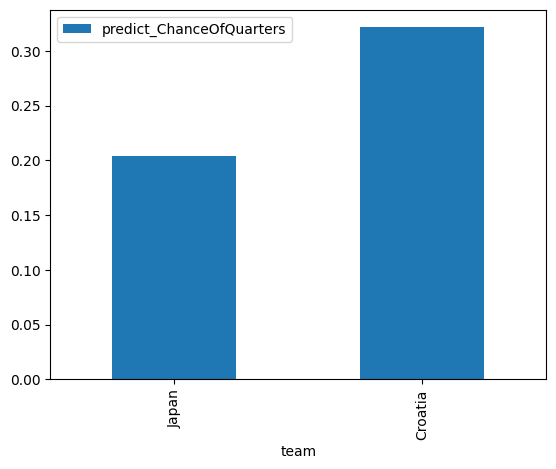

In [322]:
gameQ3.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [323]:
WinnerOfGameQ3 = gameQ3.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483


In [324]:
dfQuarter7 = dfCandidateQ[dfCandidateQ.team == "Brazil"]
dfQuarter7

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484


In [325]:
dfQuarter8 = dfCandidateQ[dfCandidateQ.team == "South Korea"]
dfQuarter8

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
56,2022-11-28 20:59:50 UTC,South Korea,H,70.34955,1.84149,0.71967,0.16703,1.24741,1.58556,-1.94343,...,0.65417,0.08912,0.01607,0.00556,0.00247,0.00101,2022-12-02 21:02:41 UTC,-0.002803,0.19259,0.06597


In [326]:
frameQ4 = [dfQuarter7, dfQuarter8]
gameQ4 = pd.concat(frameQ4)
gameQ4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484
56,2022-11-28 20:59:50 UTC,South Korea,H,70.34955,1.84149,0.71967,0.16703,1.24741,1.58556,-1.94343,...,0.65417,0.08912,0.01607,0.00556,0.00247,0.00101,2022-12-02 21:02:41 UTC,-0.002803,0.192590,0.065970


<AxesSubplot: xlabel='team'>

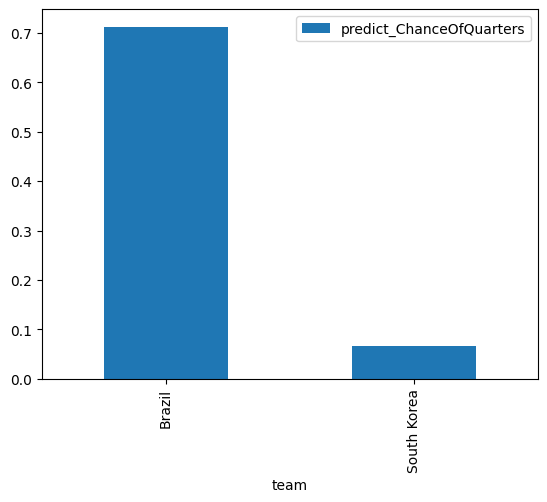

In [327]:
gameQ4.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [328]:
WinnerOfGameQ4 = gameQ4.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484


In [329]:
dfQuarter9 = dfCandidateQ[dfCandidateQ.team == "France"]
dfQuarter9

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.04986,0.82686,0.54053,0.33135,0.17187,0.0875,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596


In [330]:
dfQuarter10 = dfCandidateQ[dfCandidateQ.team == "Poland"]
dfQuarter10

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
117,2022-11-16 16:00:55 UTC,Poland,C,68.28098,1.87603,0.83283,0.84879,0.83305,1.31816,-1.06316,...,0.30112,0.3792,0.12938,0.05029,0.01471,0.00463,2022-12-02 21:02:41 UTC,0.012894,0.390686,0.156403


In [331]:
frameQ5 = [dfQuarter9, dfQuarter10]
gameQ5 = pd.concat(frameQ5)
gameQ5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596
117,2022-11-16 16:00:55 UTC,Poland,C,68.28098,1.87603,0.83283,0.84879,0.83305,1.31816,-1.06316,...,0.30112,0.37920,0.12938,0.05029,0.01471,0.00463,2022-12-02 21:02:41 UTC,0.012894,0.390686,0.156403


<AxesSubplot: xlabel='team'>

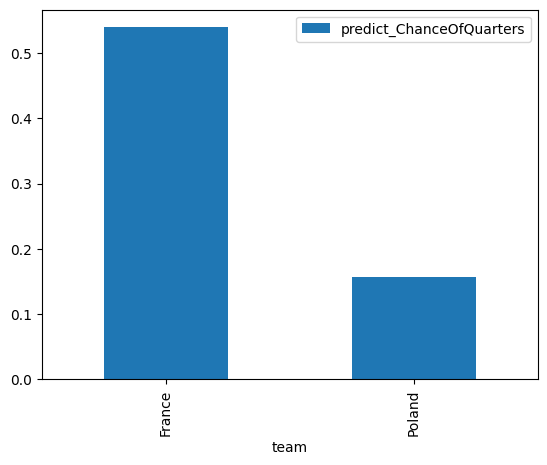

In [332]:
gameQ5.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [333]:
WinnerOfGameQ5 = gameQ5.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.04986,0.82686,0.54053,0.33135,0.17187,0.0875,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596


In [334]:
dfQuarter11 = dfCandidateQ[dfCandidateQ.team == "England"]
dfQuarter11

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368,0.983458,0.636049


In [335]:
dfQuarter12 = dfCandidateQ[dfCandidateQ.team == "Senegal"]
dfQuarter12

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.00266,0.29925,0.12513,0.04647,0.0165,0.00545,2022-12-02 21:02:41 UTC,0.039227,0.564513,0.287773


In [336]:
frameQ6 = [dfQuarter11, dfQuarter12]
gameQ6 = pd.concat(frameQ6)
gameQ6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049
50,2022-11-28 20:59:50 UTC,Senegal,A,73.00354,1.88325,0.64005,1.29687,0.33448,1.36865,-0.13904,...,0.00266,0.29925,0.12513,0.04647,0.01650,0.00545,2022-12-02 21:02:41 UTC,0.039227,0.564513,0.287773


<AxesSubplot: xlabel='team'>

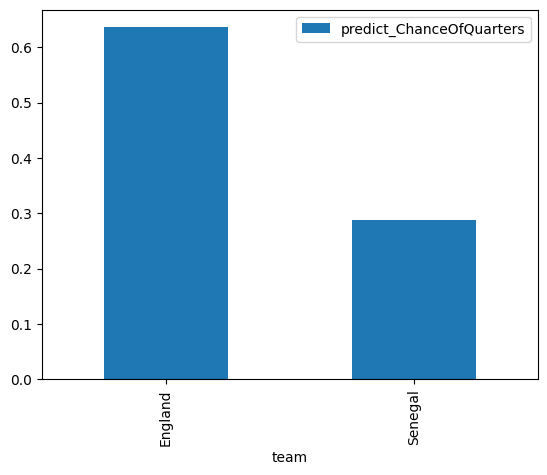

In [337]:
gameQ6.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [338]:
WinnerOfGameQ6 = gameQ6.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.0,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368,0.983458,0.636049


In [339]:
dfQuarter13 = dfCandidateQ[dfCandidateQ.team == "Morocco"]
dfQuarter13

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.0,1.0,0.0,3.0,...,0.0,1.0,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427


In [340]:
dfQuarter14 = dfCandidateQ[dfCandidateQ.team == "Spain"]
dfQuarter14

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


In [341]:
frameQ7 = [dfQuarter13, dfQuarter14]
gameQ7 = pd.concat(frameQ7)
gameQ7

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.0,1.0,0.0,3.0,...,0.0,1.0,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


<AxesSubplot: xlabel='team'>

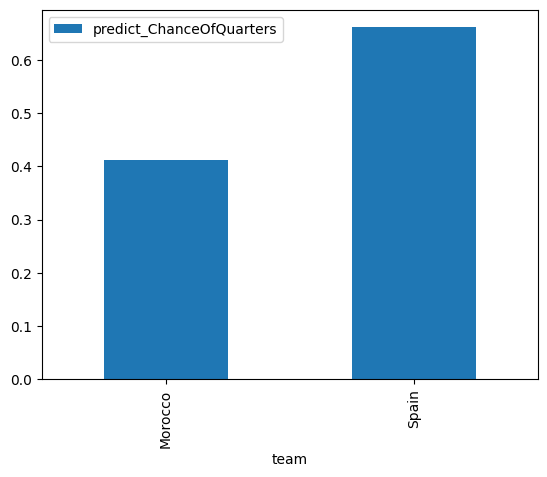

In [342]:
gameQ7.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [343]:
WinnerOfGameQ7 = gameQ7.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ7

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


In [344]:
dfQuarter15 = dfCandidateQ[dfCandidateQ.team == "Portugal"]
dfQuarter15

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.05445,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799


In [345]:
dfQuarter16 = dfCandidateQ[dfCandidateQ.team == "Switzerland"]
dfQuarter16

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
43,2022-11-28 20:59:50 UTC,Switzerland,G,77.00154,2.0892,0.61069,1.39764,0.291,1.31136,0.18218,...,0.01139,0.67869,0.24187,0.09924,0.03875,0.01281,2022-12-02 21:02:41 UTC,0.034189,0.574142,0.2519


In [346]:
frameQ8 = [dfQuarter15, dfQuarter16]
gameQ8 = pd.concat(frameQ7)
gameQ8

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.0,1.0,0.0,3.0,...,0.0,1.0,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


<AxesSubplot: xlabel='team'>

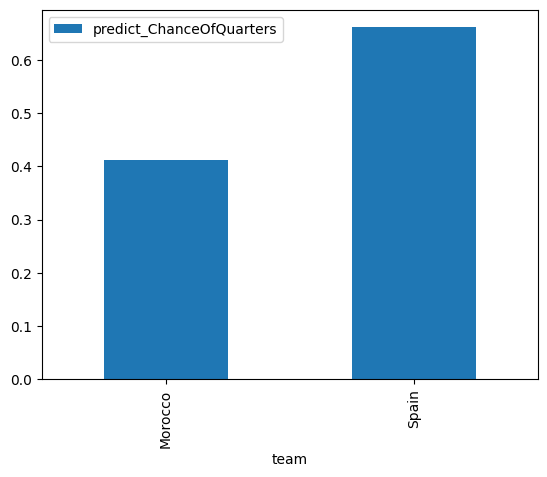

In [347]:
gameQ8.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [348]:
WinnerOfGameQ8 = gameQ7.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ8

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.0,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


In [349]:
frame_ROUNDOF16 = [WinnerOfGameQ1, WinnerOfGameQ2, WinnerOfGameQ3, WinnerOfGameQ4, WinnerOfGameQ5, WinnerOfGameQ6, WinnerOfGameQ7, WinnerOfGameQ8]
WinnersOfRound16 = pd.concat(frame_ROUNDOF16)
WinnersOfRound16

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.00000,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.21261,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.00099,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.04986,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.00000,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.00000,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887


In [350]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_semis"])
dfteam1["predict_ChanceOfSemi"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\517394336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfSemi"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.314285
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.020340,-0.015913
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.217402
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.409719
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.04935,0.01582,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068,-0.056209,-0.058117
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.25848,0.08643,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298,0.314663,0.111761,0.047323
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.13935,0.03029,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450,0.051347,-0.057755,-0.054744
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483,0.176618
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175,0.121859,-0.005291,-0.018158
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.48209,0.20916,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036,0.509301,0.252478,0.129653


In [351]:
dfCandidateS = dfteam1.sort_values("predict_ChanceOfSemi", ascending = False)
dfCandidateS

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.409719
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.387069
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049,0.364719
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.314285
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596,0.308236
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799,0.301637
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716,0.299451
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.67345,0.42428,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670,0.555090,0.373002,0.218954
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.77941,0.34298,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.217402
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,1.00000,0.26898,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427,0.211595


In [352]:
dfCandidateS1 = dfCandidateS[dfCandidateS.team == "Netherlands"]
dfCandidateS1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.3837,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716,0.299451


In [353]:
dfCandidateS2 = dfCandidateS[dfCandidateS.team == "Argentina"]
dfCandidateS2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.92822,0.552825,0.314285


In [354]:
dfCandidateS3 = dfCandidateS[dfCandidateS.team == "Croatia"]
dfCandidateS3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483,0.176618


In [355]:
dfCandidateS4 = dfCandidateS[dfCandidateS.team == "Brazil"]
dfCandidateS4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.409719


In [356]:
dfCandidateS5 = dfCandidateS[dfCandidateS.team == "France"]
dfCandidateS5

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.82686,0.54053,0.33135,0.17187,0.0875,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596,0.308236


In [357]:
dfCandidateS6 = dfCandidateS[dfCandidateS.team == "England"]
dfCandidateS6

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368,0.983458,0.636049,0.364719


In [358]:
dfCandidateS7 = dfCandidateS[dfCandidateS.team == "Spain"]
dfCandidateS7

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.387069


In [359]:
dfCandidateS8 = dfCandidateS[dfCandidateS.team == "Portugal"]
dfCandidateS8

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799,0.301637


In [360]:
frameQF1 = [dfCandidateS1, dfCandidateS2]
gameQF1 = pd.concat(frameQF1)
gameQF1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.99151,0.59733,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716,0.299451
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.314285


<AxesSubplot: xlabel='team'>

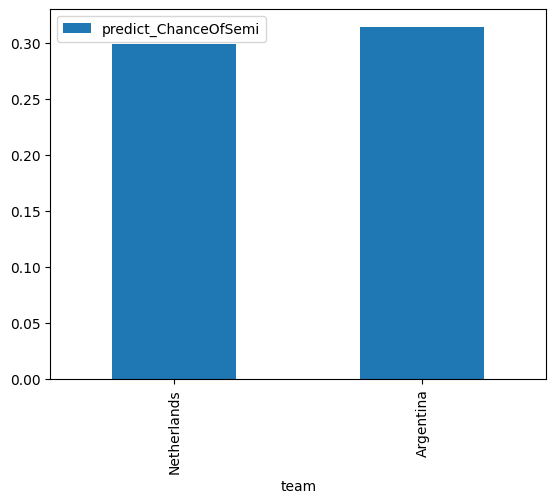

In [361]:
gameQF1.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [388]:
WinnerOfGameQF1 = gameQF1.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0,0.0,1.0,3.0,...,1.0,0.82673,0.5156,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.92822,0.552825,0.314285


In [363]:
frameQF2 = [dfCandidateS3, dfCandidateS4]
gameQF2 = pd.concat(frameQF2)
gameQF2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.54419,0.21411,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483,0.176618
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.98349,0.76231,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.409719


<AxesSubplot: xlabel='team'>

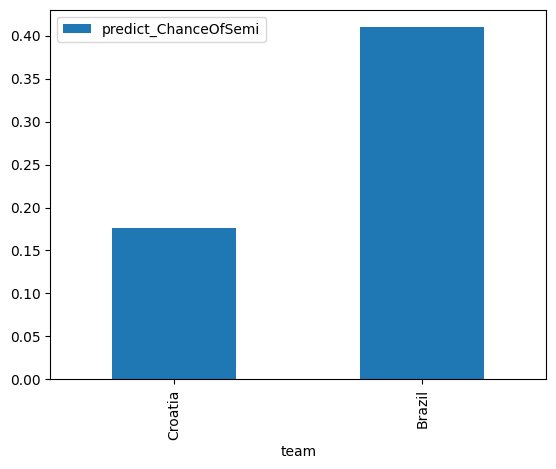

In [389]:
gameQF2.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [390]:
WinnerOfGameQF2 = gameQF2.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.98349,0.76231,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.409719


In [366]:
frameQF3 = [dfCandidateS5, dfCandidateS6]
gameQF3 = pd.concat(frameQF3)
gameQF3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.82686,0.54053,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596,0.308236
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.99916,0.59830,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049,0.364719


<AxesSubplot: xlabel='team'>

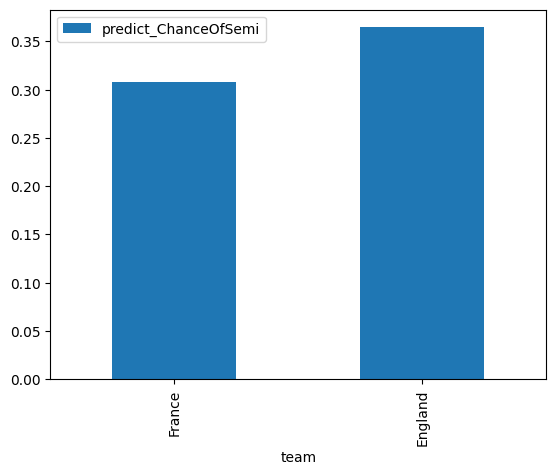

In [367]:
gameQF3.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [391]:
WinnerOfGameQF3 = gameQF3.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF3

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.99916,0.5983,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.10368,0.983458,0.636049,0.364719


In [369]:
frameQF4 = [dfCandidateS7, dfCandidateS8]
gameQF4 = pd.concat(frameQF4)
gameQF4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,1.00000,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.387069
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.81087,0.45583,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799,0.301637


<AxesSubplot: xlabel='team'>

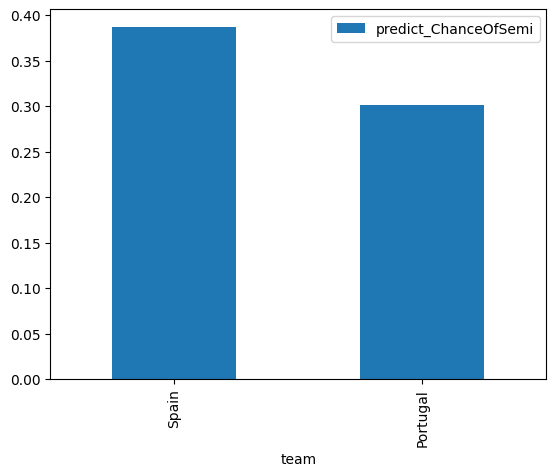

In [370]:
gameQF4.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [392]:
WinnerOfGameQF4 = gameQF4.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF4

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,1.0,0.73102,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.387069


In [402]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_final"])
dfteam1["predict_ChanceOfFinal"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\4002768942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfFinal"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.093717,0.093717,0.171903
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.020340,-0.015895,-0.015895,-0.021828
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.062896,0.062896,0.115377
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068,-0.056209,-0.027425,-0.027425,-0.043342
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298,0.314663,0.111761,0.007075,0.007075,0.018598
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450,0.051347,-0.057755,-0.017931,-0.017931,-0.034095
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483,0.048652,0.048652,0.093503
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175,0.121859,-0.005291,-0.013553,-0.013553,-0.016874
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036,0.509301,0.252478,0.031882,0.031882,0.063794


In [403]:
dfCandidateF = dfteam1.sort_values("predict_ChanceOfFinal", ascending = False)
dfCandidateF

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.106654,0.106654,0.209541
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049,0.102741,0.102741,0.196316
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.093717,0.093717,0.171903
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596,0.090853,0.090853,0.168550
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799,0.088950,0.088950,0.165097
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716,0.084839,0.084839,0.159244
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670,0.555090,0.373002,0.063079,0.063079,0.122018
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.062896,0.062896,0.115377
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427,0.056029,0.056029,0.104014


In [406]:
frameSF1 = [dfCandidateF[dfCandidateF.team == "Argentina"], dfCandidateF[dfCandidateF.team == "Brazil"]]
gameSF1 = pd.concat(frameSF1)
gameSF1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.0000,0.00000,1.00000,3.00000,...,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.093717,0.093717,0.171903
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596


<AxesSubplot: xlabel='team'>

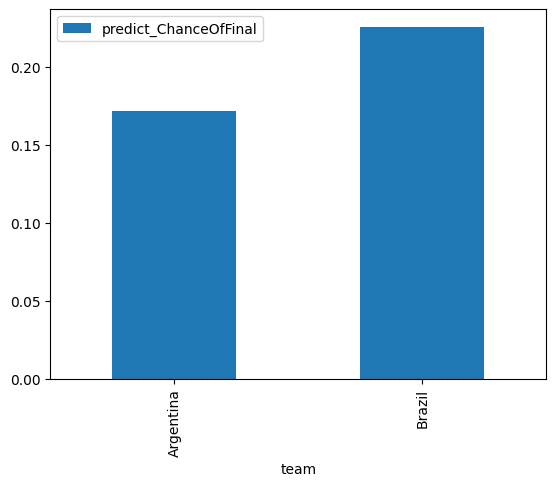

In [407]:
gameSF1.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [408]:
WinnerOfGameSF1 = gameSF1.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596


In [411]:
frameSF2 = [dfCandidateF[dfCandidateF.team == "England"], dfCandidateF[dfCandidateF.team == "Spain"]]
gameSF2 = pd.concat(frameSF2)
gameSF2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.9891,...,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049,0.102741,0.102741,0.196316
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.0000,...,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.106654,0.106654,0.209541


<AxesSubplot: xlabel='team'>

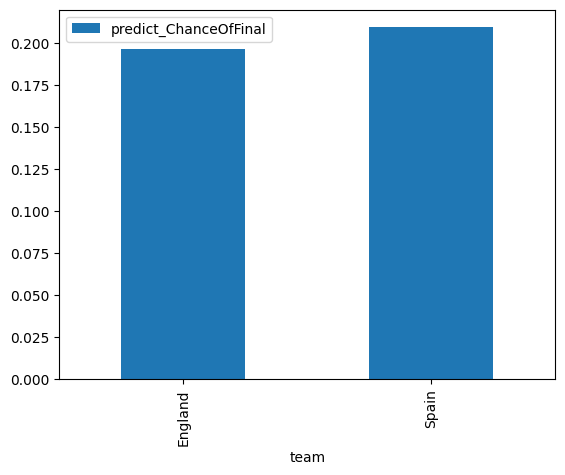

In [412]:
gameSF2.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [413]:
WinnerOfGameSF2 = gameSF2.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF2

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0,1.0,1.0,6.0,...,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.106654,0.106654,0.209541


In [414]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["win_league"])
dfteam1["predict_ChanceOfWinLeague"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_12908\4142370600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam1["predict_ChanceOfWinLeague"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])


,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.093717,0.093717,0.171903
124,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.02062,0.00454,0.00124,2022-12-02 21:02:41 UTC,-0.014706,0.222104,0.020340,-0.015895,-0.015895,-0.021828
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.062896,0.062896,0.115377
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
92,2022-11-24 20:56:17 UTC,Cameroon,G,63.62287,1.59463,0.79825,0.28323,0.45682,2.25995,-3.34378,...,0.00554,0.00210,0.00061,2022-12-02 21:02:41 UTC,-0.026835,0.102068,-0.056209,-0.027425,-0.027425,-0.043342
88,2022-11-24 20:56:17 UTC,Canada,F,73.84345,2.02414,0.70416,0.61657,0.61764,1.76579,-1.30683,...,0.02833,0.01199,0.00427,2022-12-02 21:02:41 UTC,0.007298,0.314663,0.111761,0.007075,0.007075,0.018598
60,2022-11-28 20:59:50 UTC,Costa Rica,E,52.89792,1.27862,0.94276,1.05175,0.14240,1.80585,-8.01357,...,0.00548,0.00108,0.00020,2022-12-02 21:02:41 UTC,-0.024450,0.051347,-0.057755,-0.017931,-0.017931,-0.034095
107,2022-11-16 16:00:55 UTC,Croatia,F,78.84025,2.28577,0.65525,1.15695,0.84997,0.99308,0.32548,...,0.08819,0.04219,0.01702,2022-12-02 21:02:41 UTC,0.047563,0.570806,0.321483,0.048652,0.048652,0.093503
27,2022-12-02 21:01:10 UTC,Denmark,D,76.68220,2.04580,0.59589,0.00000,1.00000,2.00000,-2.00000,...,0.00000,0.00000,0.00000,2022-12-02 21:02:41 UTC,-0.013175,0.121859,-0.005291,-0.013553,-0.013553,-0.016874
112,2022-11-16 16:00:55 UTC,Ecuador,A,72.74127,1.95582,0.70294,1.06051,0.83314,1.10635,-0.08847,...,0.08389,0.02817,0.01022,2022-12-02 21:02:41 UTC,0.032036,0.509301,0.252478,0.031882,0.031882,0.063794


In [416]:
dfCandidateW = dfteam1.sort_values("predict_ChanceOfWinLeague", ascending = False)
dfCandidateW

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.44470,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.00000,1.00000,1.00000,6.00000,...,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.106654,0.106654,0.209541
37,2022-11-28 20:59:50 UTC,England,B,85.40758,2.54769,0.48612,1.60056,1.25646,0.14298,4.98910,...,0.29438,0.14332,0.06282,2022-12-02 21:02:41 UTC,0.103680,0.983458,0.636049,0.102741,0.102741,0.196316
2,2022-12-02 21:01:10 UTC,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,0.51560,0.24966,0.13119,2022-12-02 21:02:41 UTC,0.092901,0.928220,0.552825,0.093717,0.093717,0.171903
98,2022-11-16 16:00:55 UTC,France,D,87.70516,2.77362,0.47923,1.78422,0.73505,0.48073,2.96537,...,0.33135,0.17187,0.08750,2022-12-02 21:02:41 UTC,0.089996,0.883714,0.539596,0.090853,0.090853,0.168550
100,2022-11-16 16:00:55 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74211,0.74742,0.51047,2.80761,...,0.26028,0.15248,0.07629,2022-12-02 21:02:41 UTC,0.087985,0.864307,0.527799,0.088950,0.088950,0.165097
39,2022-11-28 20:59:50 UTC,Netherlands,A,84.38370,2.59307,0.56564,1.77578,1.15339,0.07083,3.89088,...,0.32199,0.12204,0.05723,2022-12-02 21:02:41 UTC,0.086243,0.921042,0.535716,0.084839,0.084839,0.159244
38,2022-11-28 20:59:50 UTC,Germany,E,88.86004,3.15327,0.60378,0.80585,1.14240,1.05175,1.01357,...,0.24106,0.12928,0.05919,2022-12-02 21:02:41 UTC,0.060670,0.555090,0.373002,0.063079,0.063079,0.122018
72,2022-11-24 20:56:17 UTC,Belgium,F,80.53709,2.52178,0.72241,1.77229,0.56993,0.65778,1.24981,...,0.14180,0.06427,0.02415,2022-12-02 21:02:41 UTC,0.062559,0.749886,0.399033,0.062896,0.062896,0.115377
11,2022-12-02 21:01:10 UTC,Morocco,F,74.42499,1.86603,0.56935,2.00000,1.00000,0.00000,3.00000,...,0.11057,0.04279,0.01426,2022-12-02 21:02:41 UTC,0.059812,0.872054,0.412427,0.056029,0.056029,0.104014


In [422]:
frameW1 = [dfCandidateW[dfCandidateW.team == "Brazil"], dfCandidateW[dfCandidateW.team == "Spain"]]
gameW1 = pd.concat(frameW1)
gameW1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.24760,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
1,2022-12-02 21:01:10 UTC,Spain,E,89.20054,2.72756,0.36851,1.0000,1.00000,1.00000,6.00000,...,0.45168,0.25872,0.13534,2022-12-02 21:02:41 UTC,0.107812,0.930675,0.660887,0.106654,0.106654,0.209541


<AxesSubplot: xlabel='team'>

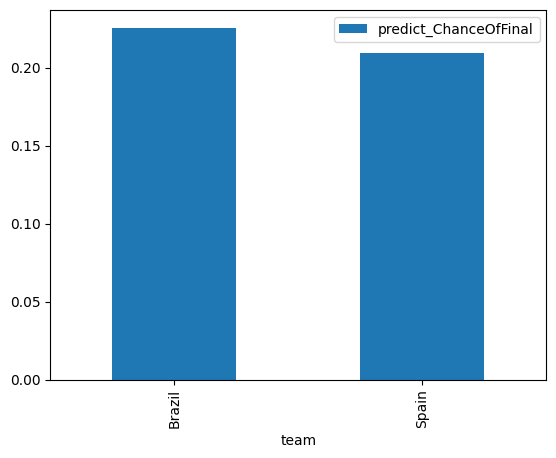

In [420]:
gameW1.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [423]:
WinnerOfGameW1 = gameW1.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameW1

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfWinLeague,predict_ChanceOfFinal
64,2022-11-24 20:56:17 UTC,Brazil,G,93.65727,3.15479,0.26042,2.4447,0.39723,0.15807,5.06266,...,0.50478,0.36793,0.2476,2022-12-02 21:02:41 UTC,0.123343,1.160808,0.712484,0.123667,0.123667,0.225596
